# Google Mobility: Consumer Activity

### Phillip's Code:

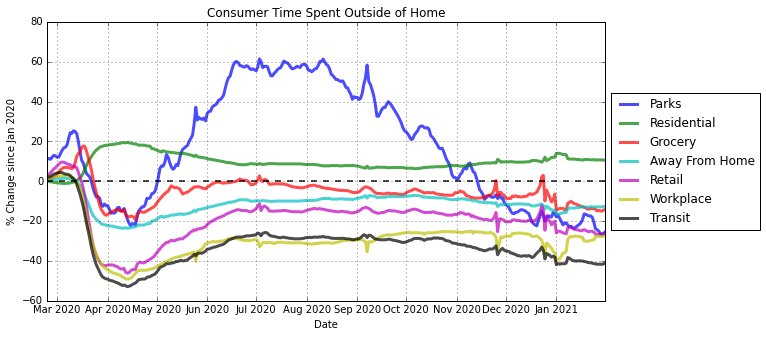

In [1]:
# Importing the libraries and required tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Importing Google Mobility Data
df = pd.read_csv('https://github.com/OpportunityInsights/EconomicTracker/raw/main/data/Google%20Mobility%20-%20National%20-%20Daily.csv')

# Creating a 'Date' variable to be interpreted as dates
from datetime import datetime
df['myDt'] = df.apply(lambda row: datetime.strptime(f"{int(row.year)}-{int(row.month)}-{int(row.day)}", '%Y-%m-%d'), axis=1)
df.index = df['myDt']
# Other options: df.index = pd.to_datetime(df['myDt'])
# df.year.astype(str)

# Defining the columns of the Google Mobility data so that it is easier to call
retail = df['gps_retail_and_recreation']*100
grocery = df['gps_grocery_and_pharmacy']*100
parks = df['gps_parks']*100
transit = df['gps_transit_stations']*100
workplace = df['gps_workplaces']*100
residential = df['gps_residential']*100
away = df['gps_away_from_home']*100

# Note: Creating a single figure to plot all mobility data
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)

# Note: Plotting each variable
ax1.plot(parks,alpha=0.7,label='Parks',lw=3)
ax1.plot(residential,alpha=0.7,label='Residential',lw=3)
ax1.plot(grocery,alpha=0.7,label='Grocery',lw=3)
ax1.plot(away,alpha=0.7,label='Away From Home',lw=3)
ax1.plot(retail,alpha=0.7,label='Retail',lw=3)
ax1.plot(workplace,alpha=0.7,label='Workplace',lw=3)
ax1.plot(transit,alpha=0.7,label='Transit',lw=3)

# Note: Plotting a line along y=0
ax1.axhline(y=0.0, color='black', linestyle='--',lw=2,alpha=0.7)

# Note: Labels & aesthetics
ax1.set_title('Consumer Time Spent Outside of Home')
ax1.set_xlabel('Date')
ax1.set_ylabel('% Change since Jan 2020')
ax1.grid()
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Unemployment Rates by Race/Ethnicity

### Elisa's Code

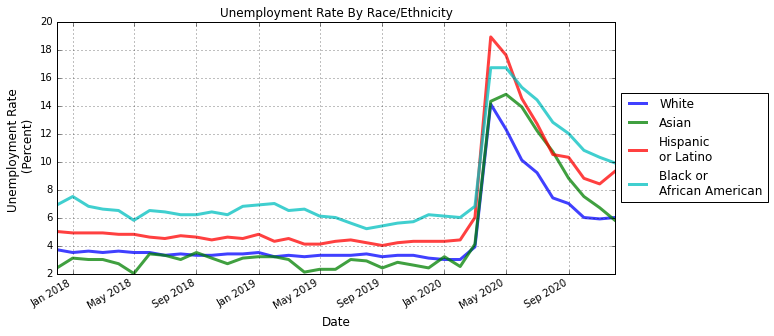

In [2]:
# Download unemployment data (White) and set unemployment_white equal to 'VALUE' column
unemployment_white = pd.read_csv('https://fred.stlouisfed.org/data/LNS14000003.txt',skiprows=13,sep='\s+',index_col=0,parse_dates=True)
unemployment_white = unemployment_white['VALUE']

# Download unemployment data (Asian) and set unemployment_asian equal to 'VALUE' column 
unemployment_asian = pd.read_csv('https://fred.stlouisfed.org/data/LNU04032183.txt',skiprows=13,sep='\s+',index_col=0,parse_dates=True)
unemployment_asian = unemployment_asian['VALUE']

# Download unemployment data (Hispanic or Latino) and set unemployment_hispanic to 'VALUE' column 
unemployment_hispanic = pd.read_csv('https://fred.stlouisfed.org/data/LNS14000009.txt',skiprows=13,sep='\s+',index_col=0,parse_dates=True)
unemployment_hispanic = unemployment_hispanic['VALUE']

# Download unemployment data (Black or African American) and set unemployment_black to 'VALUE' column
unemployment_black = pd.read_csv('https://fred.stlouisfed.org/data/LNS14000006.txt',skiprows=13,sep='\s+',index_col=0,parse_dates=True)
unemployment_black = unemployment_black['VALUE']

# Create figure and axis 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

# Plot unemployment rate (White) from December 2017 to December 2020 
ax.plot(unemployment_white[-37:],lw=3,alpha=0.75,label='White')

# Plot unemployment rate (Asian) from December 2017 to December 2020 
ax.plot(unemployment_asian[-37:],lw=3,alpha=0.75,label='Asian')

# Plot unemployment rate (Hispanic or Latino) from December 2017 to December 2020 
ax.plot(unemployment_hispanic[-37:],lw=3,alpha=0.75,label='Hispanic\nor Latino')

# Plot unemployment rate (Black or African American) December 2017 from to December 2020 
ax.plot(unemployment_black[-37:],lw=3,alpha=0.75,label='Black or\nAfrican American')

# Create title, labels and grid 
ax.set_xlabel('Date',fontsize=12)
ax.set_ylabel('Unemployment Rate \n (Percent)',fontsize=12)
ax.set_title('Unemployment Rate By Race/Ethnicity',fontsize=12)
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))
ax.grid()

# Re-format 
fig.autofmt_xdate()


# Personal Savings Rates

### Teresa's Code:

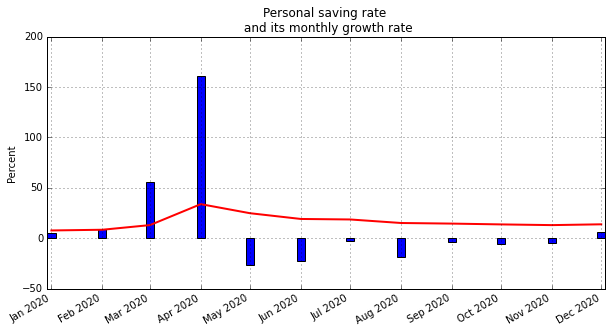

In [3]:
personalSave=pd.read_csv('https://fred.stlouisfed.org/data/PSAVERT.txt',skiprows=20,sep='\s+',index_col=0,parse_dates=True)
#The unit of the data is percent

#Set up variables
dpi=personalSave['VALUE']
dpi_lag = dpi.shift(1)
dpi_growth = dpi/dpi_lag - 1

# Create figure and axis
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

# Plot
ax.plot(dpi[-12:],'r-',lw=2)
ax.bar(dpi_growth[-12:].index,100*dpi_growth[-12:],width=5)

# Add title and y-axis label
ax.set_title('Personal saving rate \n and its monthly growth rate')
ax.set_ylabel('Percent')

# Auto-rotate the x-axis labels
fig.autofmt_xdate()
ax.grid()


# Velocity of M2 Money Supply Data

### Michael's Code:

% decrease of the Velocity of M2 Money Supply that occurred from Jul 2016-Jan 2020: 4.23
% decrease of the Velocity of M2 Money Supply that occured in 2020: 18.25
% decrease of the Velocity of M2 Money Supply that occured from Jan 2005-Jan 2008: 2.67
% decrease of the Velocity of M2 Money Supply that occurred during the 08 Financial Crisis: 10.44


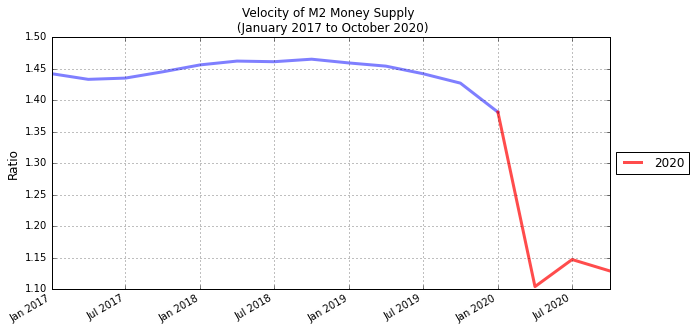

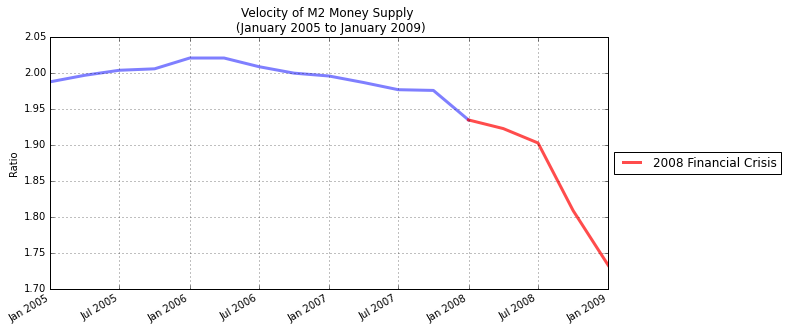

In [4]:
# Download Velocity of M2 Money Supply Data
m2_velocity = pd.read_csv('https://fred.stlouisfed.org/data/M2V.txt',skiprows=43,sep='\s+',index_col=0,parse_dates=True) 

# Set m2_velocity equal to 'VALUE' column of m2_velocity
m2_velocity = m2_velocity['VALUE']

# Print First 20 rows of m2_velocity
m2_velocity.head(10) 

# Figure of Velocity of M2 Money Supply (Ratio of quarterly nominal GDP to the quarterly average of M2 money stock) from 2017-2020

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(m2_velocity[232:245],'-',lw=3,alpha=0.5)
ax.plot(m2_velocity[244:248],'-',lw=3,alpha=0.7,color='red',label='2020')
ax.set_title('Velocity of M2 Money Supply \n (January 2017 to October 2020)',fontsize=12)
ax.set_ylabel('Ratio',fontsize=12)
ax.grid()
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))
fig.autofmt_xdate()

# Percent Decrease of Velocity of M2 Money Supply from Jan 2017 to Jan 2020
x = ((m2_velocity.iloc[232] - m2_velocity.iloc[244])/(m2_velocity.iloc[232]))*100
print('% decrease of the Velocity of M2 Money Supply that occurred from Jul 2016-Jan 2020:',x.round(2))

# Percent Decrease of Velocity of M2 Money Supply from Jan 2020 to Oct 2020
x2 = ((m2_velocity.iloc[244] - m2_velocity.iloc[247])/(m2_velocity.iloc[244]))*100
print('% decrease of the Velocity of M2 Money Supply that occured in 2020:',x2.round(2))
# Observe the velocity of M2 money supply during 08 Financial Crisis in order to compare with 2020.
# Figure of Velocity of M2 Money Supply (Ratio of quarterly nominal GDP to the quarterly average of M2 money stock) from 2005-2009
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(m2_velocity[184:197],'-',lw=3,alpha=0.5)
ax.plot(m2_velocity[196:201],'-',lw=3,alpha=0.7,color='red',label='2008 Financial Crisis')
ax.set_title('Velocity of M2 Money Supply \n (January 2005 to January 2009)')
ax.set_ylabel('Ratio')
ax.grid()
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))
fig.autofmt_xdate()

# Percent Decrease of Velocity of M2 Money Supply from Jan 2005 to Jan 2008
z = ((m2_velocity.iloc[184] - m2_velocity.iloc[196])/(m2_velocity.iloc[184]))*100
print('% decrease of the Velocity of M2 Money Supply that occured from Jan 2005-Jan 2008:',z.round(2))

# Percent Decrease of Velocity of M2 Money Supply from Jan 2008 to Jan 2009
z2 = ((m2_velocity.iloc[196] - m2_velocity.iloc[200])/(m2_velocity.iloc[196]))*100
print('% decrease of the Velocity of M2 Money Supply that occurred during the 08 Financial Crisis:',z2.round(2))


# Corporation Profits

### Tyler's Code:

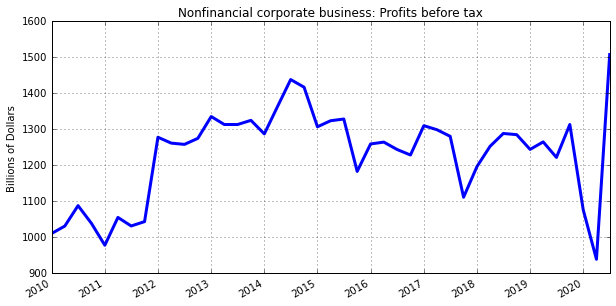

In [5]:
# Download Nonfinancial Corporation: Profits Before Tax data
profits_b4tax = pd.read_csv('https://fred.stlouisfed.org/data/A464RC1Q027SBEA.txt',skiprows=14,sep='\s+',index_col=0,parse_dates=True)
#setting data = VALUE
profits_b4tax = profits_b4tax['VALUE']
# First 5 rows of m2
profits_b4tax.head()

# Because my dates are at a quarterly basis, I am going to go back 10 years
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(profits_b4tax[-43:], '-', lw = 3)
ax.set_title('Nonfinancial corporate business: Profits before tax')
ax.set_ylabel('Billions of Dollars')
fig.autofmt_xdate()
ax.grid()
